[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SeoulTechPSE/EngNm/blob/master/ch04_code.ipynb)

# Chapter 4: Plotting and Visualization

$~$

Creator: Robert Johansson, Updator: Kee-Youn Yoo

Updated source code listings for Numerical Python - A Practical Techniques Approach for Industry (ISBN 978-1-484205-54-9)

* `Matplotlib` is a Python library for publication-quality 2D and 3D graphics, with support for a variety of different output formats. $~$At the time of writing, the latest version is 3.3.4(2021-3-26)

* More information about `matplotlib` is available at the project’s web site [https://matplotlib.org](https://matplotlib.org)
* This web site contains detailed documentation and an extensive gallery that showcases the various types of graphs that can be  using the `matplotlib` library, together with the code for each example

* This gallery is a great source of inspiration for visualization ideas, and I highly recommend exploring `matplotlib` by browsing this gallery.

## Importing matplotlib

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.size'] = 14.0

In [2]:
import numpy as np
import sympy

## Getting started

<center><img src="figs/figure_axes_schematic.png" alt="figure_axes_schematic" width="600"/> </center>

In [3]:
x = np.linspace(-5, 2, 100)

y1 = x**3 + 5*x**2 +10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

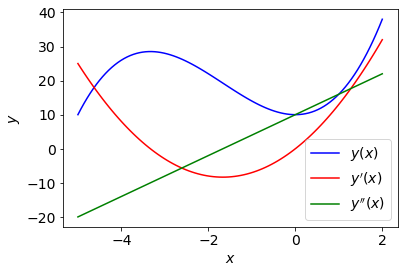

In [4]:
fig, ax = plt.subplots()

ax.plot(x, y1, color="blue", label="$y(x)$")
ax.plot(x, y2, color="red", label="$y'(x)$")
ax.plot(x, y3, color="green", label="$y''(x)$")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.legend();

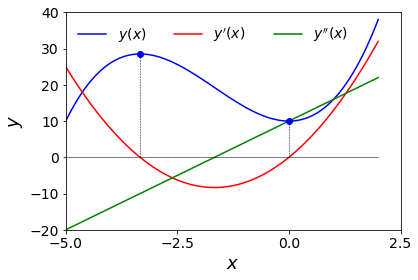

In [5]:
fig, ax = plt.subplots()

ax.plot(x, y1, lw=1.5, color="blue", label=r"$y(x)$")
ax.plot(x, y2, lw=1.5, color="red", label=r"$y'(x)$")
ax.plot(x, y3, lw=1.5, color="green", label=r"$y''(x)$")

ax.plot(x, np.zeros_like(x), lw=0.5, color="black")
ax.plot([-3.33], [(-3.3)**3 + 5*(-3.3)**2 +10], lw=0.5, marker='o', color="blue")
ax.plot([0], [10], lw=0.5, marker='o', color="blue")
ax.plot([-3.33, -3.33], [0, (-3.3)**3 +5*(-3.3)**2 + 10], ls='--', lw=0.5, color="black")
ax.plot([0, 0], [0, 10], ls='--', lw=0.5, color="black")

ax.set_xticks([-5, -2.5, 0, 2.5])
ax.set_ylim(-20, 40)
ax.set_yticks([-20, -10, 0, 10, 20, 30, 40])

ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.set_xlim([-5, 2.5])
ax.legend(loc=2, ncol=3, fontsize=14, frameon=False);

## Interactive and noninteractive modes

* The `matplotlib` library is designed to work well with many different environments and platforms. As such, the library does not only contain routines for generating graphs, but it also contains support for displaying graphs in different graphical environments 

* To this end, $~$`matplotlib` provides back ends for generating
graphics in different formats (for example, PNG, PDF, Postscript, and SVG), and for displaying graphics in a graphical user interface using variety of different widget toolkits (for example, Qt, GTK, wxWidgets and Cocoa for Mac OS X) that are suitable for different platforms

* Which back end to use can be selected in the `matplotlib` resource file, or using the function `mpl.use`, which must be called right after importing `matplotlib`, before importing the `matplotlib.pyplot` module. For example, to select the `Qt5Agg` back end, $~$we can use:

```python
    import matplotlib as mpl
    mpl.use('qt5agg')
    import matplotlib.pyplot as plt
```

* When using an interactive back end, which displays the figure
in a graphical user interface, $~$it is necessary to call the function `plt.show` to get the window to appear
on the screen. By default, the `plt.show` call will hang until the window is closed

* For a more interactive
experience, $~$we can activate interactive mode by calling the function `plt.ion`. $~$This instructs `matplotlib` to take over the GUI event loop, and show a window for a figure as soon as it is created, and returning the
control flow to the Python or IPython interpreter

* To have changes to a figure take effect, $~$we need to issue a redraw command using the function `plt.draw`

* We can deactivate the interactive mode using the function
`plt.ioff`, and we can use the function `plt.isinteractive()` to check if `matplotlib` is in interactive or
noninteractive mode

* While the interactive graphical user interfaces has unique advantages, $~$when working the Jupyter Notebook or Qtconsole, $~$it is often more convenient to display `matplotlib`-produced graphics embedded directly in the notebook

* This behavior is activated using the Jupyter magic `%matplotlib inline`, $~$which
activates the *inline back end* provided for notebook. This configures `matplotlib` to use a noninteractive back end to generate graphics images, $~$which is then displayed as static images in, for example, the Jupyter Notebook. The *inline backend* for `matplotlib` can be fine tuned using the Jupyter `%config` comman

## Figure

In [ ]:
x = np.linspace(-2, 2, 1000)

y1 = np.cos(40*x)
y2 = np.exp(-x**2)

In [ ]:
# the width and height of the figure canvas in inches
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1") 

# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

ax.plot(x, y1 *y2)
ax.plot(x, y2, 'g')
ax.plot(x,-y2, 'g')

ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

In [ ]:
fig.savefig("./figs/matplotlib_savefig.png", dpi=100, facecolor="#f1f1f1")
fig.savefig("./figs/matplotlib_savefig.pdf", dpi=300, facecolor="#f1f1f1")

## Axes

* `Matplotlib` provides several different `Axes` layout managers, which create and place `Axes` instances within a `figure` canvas following different strategies

* To facilitate the forthcoming examples, we here briefly look at one of these layout
managers: 
  
  > `plt.subplots` 
  
  Earlier in this chapter, $~$we already used this function to conveniently
generate new `Figure` and `Axes` objects in one function call 

* However, the `plt.subplots` function is also
capable of filling a figure with a grid of `Axes` instances, which is specified using the first and the second arguments, or alternatively with the `nrows` and `ncols` arguments, which, as the names implies, creates a grid of `Axes` objects, with the given number of rows and columns

```python
    fig, axes = plt.subplots(nrows=3, ncols=2)
```

* Here, the function `plt.subplots` returns a tuple `(fig, axes)`, where `fig` is a `figure` and `axes` is a numpy array of size `(ncols, nrows)`, $~$in which each element is an `Axes` instance that has been appropriately placed in the corresponding `figure` canvas. $~$At this point we can also specify that columns and/or rows should share x and y axes, using the `sharex` and `sharey` arguments, which can be set to `True` or `False`

* The `plt.subplots` function also takes two special keyword arguments `fig_kw` and `subplot_kw`, which
are dictionaries with keyword arguments that are used when creating the `Figure` and `Axes` instances,
respectively. This allows us to set and retain full control of the properties of the `Figure` and `Axes` objects with `plt.subplots`, a similar way as is possible when directly using `plt.figure` and the `make_axes` method

## Plot types

`Matplotlib` implements many types of plotting techniques as methods of the `Axes` object.

<center><img src="./figs/fig4.6.png" alt="Overview of selected 2D graph types" width="800"/> </center>

For details, see the `docstrings` for each method shown in Figure, using, for example, `help(plt.Axes.bar)`

In [ ]:
def hide_labels(fig, ax, fignum):
       
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    ax.axis('tight')
    
    fignum += 1
    fig.savefig("./figs/plot_types_%d.pdf" % fignum)

In [ ]:
x = np.linspace(-3, 3, 25)
y1 = x**3 + 3*x**2 +10
y2 = -1.5*x**3 + 10*x**2 - 15

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x, y1)
ax.plot(x, y2)

hide_labels(fig, ax, 1)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.step(x, y1)
ax.step(x, y2)

hide_labels(fig, ax, 2)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

width = 6/50

ax.bar(x -width/2, y1, width=width, color="blue", edgecolor="black")
ax.bar(x +width/2, y2, width=width, color="green", edgecolor="black")

hide_labels(fig, ax, 3)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(y2, bins=30, edgecolor="black")
ax.hist(y1, bins=30, edgecolor="black")

hide_labels(fig, ax, 4)

---

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(x, y2, yerr=y1, lw=0.6, fmt='--o', capsize=5)

hide_labels(fig, ax, 5)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.fill_between(x, y1, y2, edgecolor="black")

hide_labels(fig, ax, 6)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.stem(x, y2, 'b', markerfmt='bs', use_line_collection=True)
ax.stem(x, y1, 'r', markerfmt='ro', use_line_collection=True)

hide_labels(fig, ax, 7)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

x = np.linspace(0, 5, 50)

ax.scatter(x, -1 + x + 0.25*x**2 + 2*np.random.rand(len(x)))
ax.scatter(x, np.sqrt(x) + 2*np.random.rand(len(x)), color="green")

hide_labels(fig, ax, 8)

In [ ]:
x = y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
U = np.sin(X)
V = np.sin(Y)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.quiver(X, Y, U, V)
hide_labels(fig, ax, 9)

## Line properties

In `matplotlib`, $~$we set the line properties with keyword arguments to the plot methods,
such as for example `plot`, `step`, `bar`

In [ ]:
def axes_settings(fig, ax, title, ymax):
    ax.set_title(title)
    ax.set_ylim(0, ymax +1)
    ax.set_xticks([])
    ax.set_yticks([])
    
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

# Line width
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    ax.plot(x, y + n, color="blue", linewidth=linewidth)
    
axes_settings(fig, ax, "linewidth", len(linewidths))

In [ ]:
 fig, ax = plt.subplots(figsize=(8, 5))  

# Line style
linestyles = ['-', '--', '-.', ':']
for n, linestyle in enumerate(linestyles):
    ax.plot(x, y + n, color="blue", linestyle=linestyle)

# Custom dash style
line, = ax.plot(x, y + len(linestyles), color="red", lw=2)
length1, gap1, length2, gap2 = 5, 2, 10, 2
line.set_dashes([length1, gap1, length2, gap2])
    
axes_settings(fig, ax, "linestyle", len(linestyles) + 1)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
 
# Marker types
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    ax.plot(x, y + n, color="blue", lw=0, marker=marker)
    
axes_settings(fig, ax, "markers", len(markers))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

# Marker size and color
markersizeandcolors = [(4, "white"), (8, "red"), (12, "yellow"), (16, "lightgreen")]
for n, (markersize, markercolor) in enumerate(markersizeandcolors):
    ax.plot(x, y +  n, color="blue", lw=1, ls='-', 
                 marker='o',
                 markersize=markersize,
                 markerfacecolor=markercolor, 
                 markeredgewidth=2)
    
axes_settings(fig, ax, "marker size/color", len(markersizeandcolors))

In [ ]:
# a symboloc variable for x, and a numerical array with specific values of x
sym_x = sympy.Symbol("x")
x = np.linspace(-2*np.pi, 2*np.pi, 100)

def sin_expansion(x, n):
    """
    Evaluate the n-th order Taylor series expansion of sin(x)
    for numerical values in the numpy array x.
    """
    
    return sympy.lambdify(sym_x, sympy.sin(sym_x).series(n=n).removeO(), 'numpy')(x)

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), lw=4, color="red", label='exact')

colors = ["blue", "black"]
linestyles =[':', '-.', '--']

for idx, n in enumerate(range(2, 13, 2)):
    
    ax.plot(x, sin_expansion(x, n), color=colors[idx//3], ls=linestyles[idx%3], lw=3, label=f'O({n}) approx.')
    
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)
ax.set_ylim(-1.25, 1.25)

# place a legend outside of the Axes
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0);

In [ ]:
data1 = np.random.randn(200, 2) * np.array([3, 1])
data2 = np.random.randn(200, 2) * np.array([1, 3])

fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

axes[0].scatter(data1[:, 0], data1[:, 1], color="green", marker="s", s=30, alpha=0.5)
axes[0].scatter(data2[:, 0], data2[:, 1], color="blue", marker="o", s=30, alpha=0.5)

axes[1].hist([data1[:, 1], data2[:, 1]], bins=15, color=["green", "blue"], alpha=0.5, orientation='horizontal');

## Legends

* See `help(plt.legend)` for details. $~$The `loc` argument allows us to specify where in the `Axes` area the `legend` is to be added: `loc=1` for upper right corner, `loc=2` for
upper left corner, `loc=3` for the lower-left corner, and `loc=4` for lower right corner.

* In the example of the previous section, $~$we used the `bbox_to_anchor`, which helps the `legend` be
placed at an arbitrary location within the `figure` canvas. The `bbox_to_anchor` argument takes the value of a
tuple on the form `(x, y)`, where `x` and `y` are the canvas coordinates within the `Axes` object. That is, the point `(0, 0)` corresponds to the lower-left corner, and `(1, 1)` corresponds to the upper right corner. Note that `x` and `y` can be smaller than `0` and larger than `1`, in this case, which indicates that the `legend` is to be placed outside the `Axes` area, $~$as was used in the previous section.

* By default, all lines in the `legend` are shown in a vertical arrangement. Using the `ncols` argument, it is
possible to split the `legend` labels into multiple columns

In [ ]:
x = np.linspace(0, 1, 100)

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

for n in range(4):
    axes[n].plot(x, x, label="y(x) = x")
    axes[n].plot(x, x + x**2, label="y(x) = x + x**2")
    axes[n].legend(loc=n + 1)
    axes[n].set_title(f'legend(loc={n + 1})')

In [ ]:
x = np.linspace(-1, 1, 100)

def linear_eqn(x, slope):
    return slope*x

fig, ax = plt.subplots()

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black', 'orange']

for slope in range(1, 9):
    ax.plot(x, linear_eqn(x, slope), color=colors[slope -1], label="y(x)=%dx" % slope)
    
ax.set_xlim(-1, 1)
ax.set_ylim(-8, 8)    
    
ax.legend(bbox_to_anchor=(1.02, 0), ncol=2, loc=3, borderaxespad=0.0);   

## Text formatting and annotations

* `Matplotlib` provides several ways of configuring fonts properties. $~$The default values can be set in the `matplotlib` resource file. $~$To display where the currently active `matplotlib` file is loaded from, $~$one can do the following: 

    ```python
    mpl.matplotlib_fname()
    ```

In [ ]:
mpl.matplotlib_fname()

* And session-wide configuration can be set in the `mpl.rcParams` dictionary: $~$for example,

    ```python
    mpl.rcParams['font.size'] = 12.0
    ```
    
* Try `print(mpl.rcParams)` to get a list of possible configuration parameters and their current values. 

In [ ]:
print(mpl.rcParams)

* See also the `mpl.rc` function, for example, 

   ```python
   mpl.rc('font', size=12.0, style='normal')
   ```

   and the `mpl.rcdefaults` to restore the default values.

* `Matplotlib` provides excellent support for $\LaTeX$ markup within its text labels: Any text label in `matplotlib` can include $\LaTeX$ math by enclosing it within `$` signs: for
example `'Regular text: $f(x)=1-x^2$'`

* By default, `matplotlib` uses an internal $\LaTeX$ rendering, which
supports a subset of $\LaTeX$ language. However, by setting the configuration parameter `mpl.rcParams['text.usetex']=True`, $~$it is also possible to use an external full-featured $\LaTeX$ engine

* When embedding $\LaTeX$ code in strings in Python there is a common stumbling block: Python uses
`\` as escape character, while in $\LaTeX$ it is used to denote the start of commands. To prevent the Python
interpreter from escaping characters in strings containing $\LaTeX$ expressions, it is convenient to use raw
strings, which are literal string expressions that are prepended with an `r`, for example: `r"$\int f(x) dx$"`
and `r'$x_{\rm A}$'`.

In [ ]:
x = np.linspace(-20, 20, 100)
y = np.sin(x)/x

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y)

ax.set_xlabel("x label")
ax.set_ylabel("y label")

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_rotation(45)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-0.50, 3.50)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

# text label
ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

# annotation
ax.plot(1, 0, "o")
ax.annotate("Annotation", fontsize=14, family="serif",
            xy=(1, 0), xycoords="data",
            xytext=(20, 50), textcoords="offset points",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))

# equation
ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")
plt.show()

## Axis properties

### Axis labels and titles

In [ ]:
x = np.linspace(0, 50, 500)
y = np.sin(x)*np.exp(-x/10)

fig, ax = plt.subplots(figsize=(8, 2), subplot_kw={'facecolor': "#ebf5ff"})

ax.plot(x, y, lw=2)
ax.set_xlim([0, 50])
ax.set_ylim([-1.0, 1.0])
ax.set_xlabel("x", labelpad=5, fontsize=18, fontname='serif', color='blue')
ax.set_ylabel("f(x)", labelpad=5, fontsize=18, fontname='serif', color='blue')
ax.set_title("axis labels and title example", fontsize=16, fontname='serif', color='blue', loc='center');

### Axis range

In [ ]:
x = np.linspace(0, 30, 500)
y = np.sin(x)*np.exp(-x/10)

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 3), subplot_kw={'facecolor': '#ebf5ff'})

axes[0].plot(x, y, lw=2), axes[0].set_xlim(-5, 35), axes[0].set_ylim(-1, 1)
axes[0].set_title("set_[x/y]lim")

axes[1].plot(x, y, lw=2), axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2), axes[2].axis('equal')
axes[2].set_title("axis('equal')")

axes[3].plot(x, y, lw=2), axes[3].autoscale(True)
axes[3].set_title("autoscale(True)");

### Axis ticks, tick labels, and grids

<center><img src="figs/figure_axis_schematic.png" alt="major and minor ticks" width="600"/> </center>

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi, 500)
y = np.sin(x)*np.exp(-x**2/20)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(x, y, lw=2), axes[0].set_title("default ticks")
axes[0].tick_params(which='both', direction='in')

axes[1].plot(x, y, lw=2), axes[1].set_title("set_[x/y]ticks")
axes[1].set_xticks([-5, 0, 5])
axes[1].set_yticks([-1, 0, 1])
axes[1].tick_params(which='both', direction='in')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(x, y, lw=2), axes[0].set_title("set_major/minor_locator")
axes[0].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[0].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[0].yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[0].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[0].tick_params(which='both', direction='in')

axes[1].plot(x, y, lw=2), axes[1].set_title("set_[x/y]ticklabels")
axes[1].set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
axes[1].set_xticklabels(['$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$'])
axes[1].xaxis.set_minor_locator(mpl.ticker.FixedLocator([-3*np.pi/2, -np.pi/2, 0, np.pi/2, 3*np.pi/2]))
axes[1].set_yticks([-1, 0, 1])
axes[1].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[1].tick_params(which='both', direction='in')

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(4))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
    
axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", ls=':', lw=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="gray", which="major", axis='x', ls='-', lw=0.5)
axes[2].grid(color="gray", which="minor", axis='x', ls=':', lw=0.25)
axes[2].grid(color="gray", which="major", axis='y', ls='-', lw=0.5)

In [ ]:
x = np.linspace(0, 1e5, 100)
y = x**2

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(x, y, 'b.')
axes[0].set_title("default labels", loc='right')

axes[1].plot(x, y, 'b')
axes[1].set_title("scientific notation labels", loc='right')

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
#formatter.set_scientific(True)
formatter.set_powerlimits((-1, 2))

axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

### Log plots

In [ ]:
x = np.linspace(0, 1e3, 100)
y1, y2 = x**3, x**4

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].set_title('loglog')
axes[0].loglog(x, y1, 'b', x, y2, 'r')

axes[1].set_title('semilogy')
axes[1].semilogy(x, y1, 'b', x, y2, 'r')

axes[2].set_title('plot set_[x/y]scale')
axes[2].plot(x, y1, 'b', x, y2, 'r')
axes[2].set_xscale('log')
axes[2].set_yscale('log')

### Twin axes

In [ ]:
r = np.linspace(0, 5, 100)
a = 4*np.pi*r**2      # area
v = (4*np.pi/3)*r**3  # volume

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius, [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"surface area, [$m^2$]", fontsize=16, color="blue")
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 350)

for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"volume, [$m^3$]", fontsize=16, color="red")
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 600)
for label in ax2.get_yticklabels():
    label.set_color("red")

### Splines

In [ ]:
x = np.linspace(-10, 10, 500)
y = np.sin(x)/x

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, lw=2)

ax.set_xticks([-10, -5, 5, 10])
ax.set_yticks([0.5, 1])

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spines to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

## Advanced axes layouts

### Insets

In [ ]:
def f(x):
    return 1/(1 +x**2) +0.1/(1 +((3 -x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), lw=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    ax.tick_params(which='both', direction='in')

In [ ]:
x = np.linspace(-4, 14, 1000)    
    
fig = plt.figure(figsize=(15, 6))    

ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5") # main graph
plot_and_format_axes(ax, x, f, 18)

x0, x1 = 2.5, 3.5
x = np.linspace(x0, x1, 1000)

ax.axvline(x0, ymax=0.3, color="gray", ls=':')
ax.axvline(x1, ymax=0.3, color="gray", ls=':')

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none') # inset
plot_and_format_axes(ax, x, f, 14)

### Subplots

In [ ]:
x1 = np.random.randn(100)
x2 = np.random.randn(100)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True, 
                         squeeze=False) # squeeze=False, the axes is always a two-dimensional array

axes[0, 0].set_title("Uncorrelated"),                 axes[0, 0].scatter(x1, x2)
axes[0, 1].set_title("Weakly positively correlated"), axes[0, 1].scatter(x1, x1 +x2)
axes[1, 0].set_title("Weakly negatively correlated"), axes[1, 0].scatter(x1,-x1 +x2)
axes[1, 1].set_title("Strongly correlated"),          axes[1, 1].scatter(x1, x1 +0.15*x2)

axes[1, 1].set_xlabel("x"), axes[1, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y"), axes[1, 0].set_ylabel("y")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1, hspace=0.2)

### Subplot2grid

In [ ]:
def plot_and_format_axes(ax, ax_number):
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)    
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(6))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(6))
    ax.tick_params(which='both', direction='in', top=True, right=True)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.text(3, 3, "ax%d" % ax_number, horizontalalignment='center', verticalalignment='center')

In [ ]:
ax0 = plt.subplot2grid((3, 3), (0, 0))
ax1 = plt.subplot2grid((3, 3), (0, 1))
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)

axes = np.array([ax0, ax1, ax2, ax3, ax4])

for i in range(5):
    plot_and_format_axes(axes[i], i)

### GridSpec

In [ ]:
fig = plt.figure(figsize=(6, 4))

gs = mpl.gridspec.GridSpec(4, 4)

ax0, ax1 = fig.add_subplot(gs[0, 0]),  fig.add_subplot(gs[1, 1])
ax2, ax3 = fig.add_subplot(gs[2, 2]),  fig.add_subplot(gs[3, 3])
ax4, ax5 = fig.add_subplot(gs[0, 1:]), fig.add_subplot(gs[1:, 0])
ax6, ax7 = fig.add_subplot(gs[1, 2:]), fig.add_subplot(gs[2:, 1])
ax8, ax9 = fig.add_subplot(gs[2, 3]),  fig.add_subplot(gs[3, 2])

axes = np.array([ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9])

for i in range(10):
    plot_and_format_axes(axes[i], i)

In [ ]:
fig = plt.figure(figsize=(4, 4))

gs = mpl.gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4],
                          wspace=0.05, hspace=0.05)

ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 1])

axes = np.array([ax0, ax1, ax2])

for i in range(3):
    plot_and_format_axes(axes[i], i)

## Colormap plots

In [ ]:
x = y = np.linspace(-2, 2, 150)
X, Y = np.meshgrid(x, y)

R1 = np.sqrt((X + 0.5)**2 +(Y + 0.5)**2)
R2 = np.sqrt((X + 0.5)**2 +(Y - 0.5)**2)
R3 = np.sqrt((X - 0.5)**2 +(Y + 0.5)**2)
R4 = np.sqrt((X - 0.5)**2 +(Y - 0.5)**2)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

Z = np.sin(10 * R1) / (10 * R1) + np.sin(20 * R4) / (20 * R4)
Z = Z[:-1, :-1] # after 3.3 version

p = ax.pcolor(X, Y, Z, cmap='seismic', vmin=-abs(Z).max(), vmax=abs(Z).max())
ax.axis('tight')
ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_title("pcolor")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p, ax=ax)
cb.set_label("z")
cb.set_ticks([-1, -.5, 0, .5, 1])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

Z = 1/R1 -1/R2 -1/R3 +1/R4

im = ax.imshow(Z, vmin=-1, vmax=1, cmap=mpl.cm.bwr,
               extent=[x.min(), x.max(), y.min(), y.max()])
im.set_interpolation('bilinear')

ax.axis('tight'), ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_title("imshow")
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(im, ax=ax)
cb.set_label("z")
cb.set_ticks([-1, -.5, 0, .5, 1])

In [ ]:
x = y = np.linspace(0, 1, 75)
X, Y = np.meshgrid(x, y)
Z = - 2 *np.cos(2 *np.pi *X) *np.cos(2 *np.pi *Y) - 0.7 *np.cos(np.pi -4 *np.pi *X)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

c = ax.contour(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

ax.axis('tight'), ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_title("contour")

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

c = ax.contourf(X, Y, Z, 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

ax.axis('tight'), ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_title("contourf")

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

fig.tight_layout()
fig.savefig('./figs/ch4_colormaps.pdf')

In [ ]:
x = y = np.linspace(-10, 10, 150)

X, Y = np.meshgrid(x, y)
Z = np.cos(X) *np.cos(Y) *np.exp(-(X/5)**2 -(Y/5)**2)
P = Z[:-1, :-1] # after 3.3 version

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

def plot_and_format_axes(fig, ax, p):
    ax.axis('tight')
    ax.set_xlabel(r"$x$", fontsize=14)
    ax.set_ylabel(r"$y$", fontsize=14)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.tick_params(which='both', direction='in', top=True, right=True)

    cb0 = fig.colorbar(p, ax=ax)
    cb0.set_label(r"$z$", fontsize=14)
    cb0.set_ticks([-1, -0.5, 0, 0.5, 1])

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

p = axes[0].pcolor(X, Y, P, norm=norm, cmap=mpl.cm.bwr)
plot_and_format_axes(fig, axes[0], p)

axes[1].contour(X, Y, Z, np.linspace(-1.0, 1.0, 20), norm=norm, cmap=mpl.cm.bwr)
plot_and_format_axes(fig, axes[1], p)

plt.subplots_adjust(wspace=0.2)

In [ ]:
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

# A low hump with a spike coming out.
# Needs to have z/colour axis on a log scale so we see both hump and spike.

Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(10 * X)**2 - (10 * Y)**2)
Z = Z1 + 50 * Z2

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

c = axes[0].pcolor(X, Y, Z, shading='auto', norm=mpl.colors.LogNorm(vmin=Z.min(), vmax=Z.max()), cmap='PuBu_r')
fig.colorbar(c, ax=axes[0])

c = axes[1].pcolor(X, Y, Z, shading='auto', cmap='PuBu_r') # linear scale only shows the spike
fig.colorbar(c, ax=axes[1]);

The predefined color maps in `matplotlib` are available in `mpl.cm`. Try `help(mpl.cm)` or try to autocomplete in IPython on the `mpl.cm` module for a full list of available color maps

## 3D plots

* In `matplotlib`, $~$drawing 3D graphs requires using a different axes object, namely the `Axes3D` object that is available from the `mpl_toolkits.mplot3d` module. $~$We can create a 3D-aware axes instance explicitly using the constructor of the `Axes3D` class, $~$by passing a `Figure` instance as argument: 

    ```python
    ax = Axes3D(fig)
    ```

* Alternatively, $~$we can use the `add_subplot` function with the `projection='3d'` argument:

    ```python
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ```

* or use `plt.subplots` with the `subplot_kw={'projection':'3d'}` argument:

    ```python
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), subplot_kw={'projection':'3d'})
```

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(4*R) / R

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", labelpad=0.05, fontsize=12)
    ax.set_ylabel("$y$", labelpad=0.05, fontsize=12)
    ax.set_zlabel("$z$", labelpad=0.01, fontsize=12)
    ax.tick_params(axis='both', pad=0.01)  
    

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6), subplot_kw={'projection': '3d'})

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, lw=0, antialiased=False, norm=norm, cmap=mpl.cm.Blues)
title_and_labels(axes[0], "plot_surface") #, cb = fig.colorbar(p, ax=axes[0], shrink=0.6)

axes[1].plot_wireframe(X, Y, Z, rstride=3, cstride=3, color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=mpl.cm.Blues)
axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=mpl.cm.Blues)
title_and_labels(axes[2], "contour") 

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1) 

In [ ]:
def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

r = np.linspace(0, 10, 100)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6), subplot_kw={'projection': '3d'})

p = axes[0].plot(np.cos(r), np.sin(r), 6 -r)
title_and_labels(axes[0], "plot")

p = axes[1].scatter(np.cos(r), np.sin(r), 6 -r)
title_and_labels(axes[1], "scatter")

r = np.linspace(0, 6, 30)

p = axes[2].bar3d(np.cos(r), np.sin(r), np.zeros_like(r), 0.05*np.ones_like(r), 0.05*np.ones_like(r), 6 -r)
title_and_labels(axes[2], "bar3d")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1)

## Versions

In [ ]:
print("matplotlib:", mpl.__version__)
print("numpy: ", np.__version__)
print("sympy: ", sympy.__version__)